# Kaose klassikalised näited

Kõige tuntumad mittelineaarsed süsteemid, millel on kaootiline käitumine, on Lorenzi ja Rössleri süsteemid. Mõlemad on pidevad süsteemid kolmemõõtmelises faasiruumid.

## Kasulikud Pythoni funktsioonid

Selleks et süsteemide trajektoore arvutada ja atraktoreid joonistada kasutame SciPy, NumPy ja PyPlot.

In [1]:
%matplotlib inline

from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

Lisaks defineerime funktsiooni, mis lahendab dünaamilise süsteemi võrrandeid ajavahemikus $[0, t_1]$ ja joonistab trajektoori kolmemõõtmelises ruumis ajavahemikus $[t_0, t_1]$:

In [2]:
def attrplot(func, par, ini, t0, t1, dt):
    n0 = (int)(t0 / dt)
    n1 = (int)(t1 / dt)
    T = np.linspace(0, t1, n1 + 1)
    sol = odeint(func, ini, T, args = par)
    xsol = sol[n0:, 0]
    ysol = sol[n0:, 1]
    zsol = sol[n0:, 2]
    fig = plt.figure()
    ax = fig.add_subplot(111, projection = '3d')
    ax.plot(xsol, ysol, zsol)
    plt.show()

## Lorenzi süsteem

[Lorenzi süsteemi](http://en.wikipedia.org/wiki/Lorenz_system) kirjeldavad võrrandid

\begin{align}
\dot{x} &= \sigma(y - x),\\
\dot{y} &= x(\rho - z) - y,\\
\dot{z} &= xy - \beta z,
\end{align}

kus $\sigma, \rho, \beta$ on konstantsed parameetrid. Seega defineerime:

In [3]:
def lorenz(X, t, s, b, r):
    x, y, z = X
    dx = s * (y - x)
    dy = r * x - y - x * z
    dz = x * y - b * z
    return [dx, dy, dz]

Tavaliselt valitakse $\sigma = 10$, $\beta = \frac{8}{3}$ ja $\rho$ varieeritakse. Algtingimuseks valime $x_0 = z_0 = 0$ ja $y_0 = 1$. Atraktori võime joonistada ajavahemikus $[t_0, t_1] = [450, 500]$:

In [4]:
def plotl(r):
    attrplot(lorenz, (10.0, 8.0 / 3.0, r), [0.0, 1.0, 0.0], 450, 500, 0.001)

Nüüd joonistame atraktori erinevate $\rho$ väärtuste puhul:

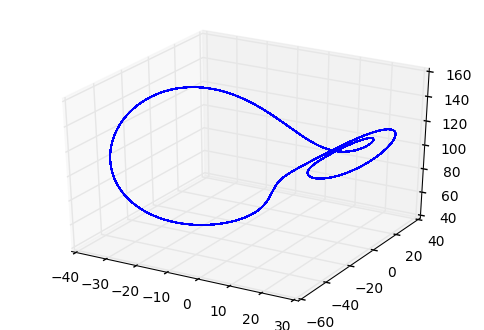

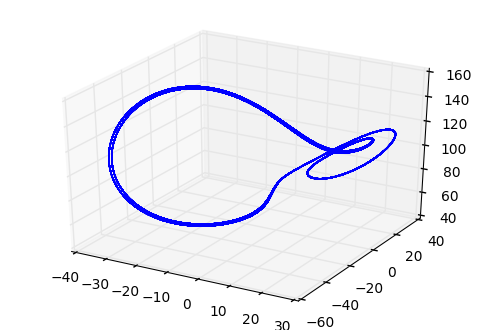

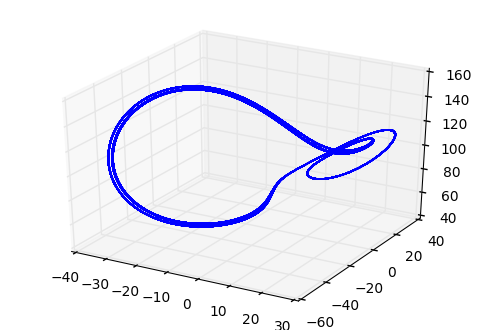

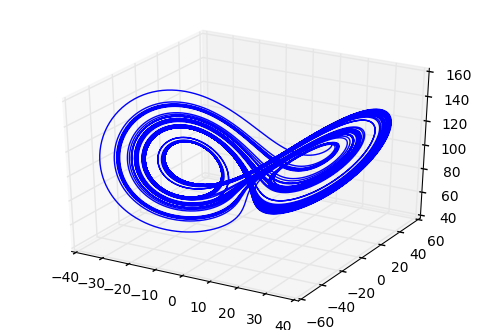

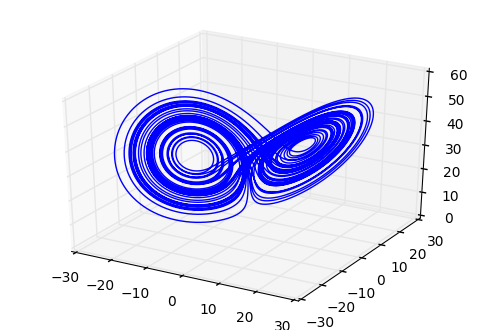

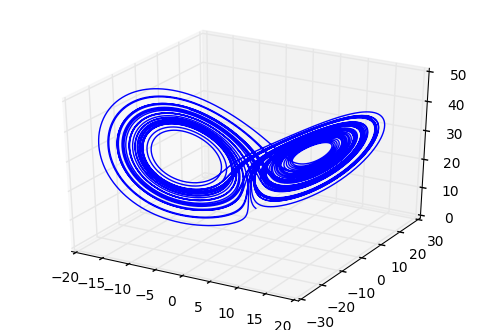

In [5]:
for r in [100.0, 99.8, 99.58, 99.0, 35.0, 28.0]:
    plotl(r)

## Rössleri süsteem

[Rössleri süsteemi](http://en.wikipedia.org/wiki/R%C3%B6ssler_attractor) kirjeldavad võrrandid

\begin{align}
\dot{x} &= -y - z,\\
\dot{y} &= x + ay,\\
\dot{z} &= b + z(x - c),
\end{align}

kus $a, b, c$ on konstantsed parameetrid. Seega defineerime:

In [6]:
def roessler(X, t, a, b, c):
    x, y, z = X
    dx = -y - z
    dy = x + a * y
    dz = b + x * z - c * z
    return [dx, dy, dz]

Tavaliselt valitakse $a = b = \frac{1}{5}$ ja $c$ varieeritakse. Algtingimuseks valime $y_0 = z_0 = 0$ ja $x_0 = -1$. Atraktori võime joonistada ajavahemikus $[t_0, t_1] = [500, 1000]$:

In [7]:
def plotr(c):
    attrplot(roessler, (0.2, 0.2, c), [-1.0, 0.0, 0.0], 500, 1000, 0.001)

Nüüd joonistame atraktori erinevate $c$ väärtuste puhul:

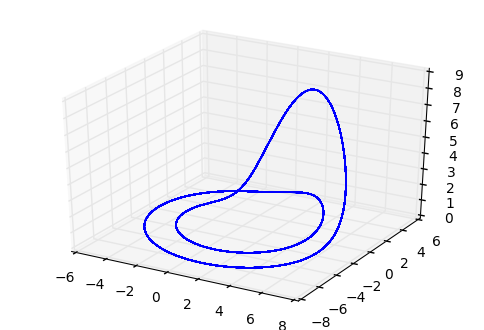

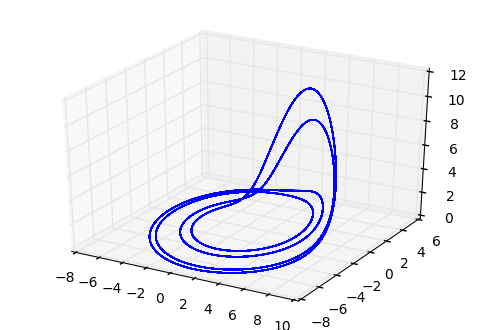

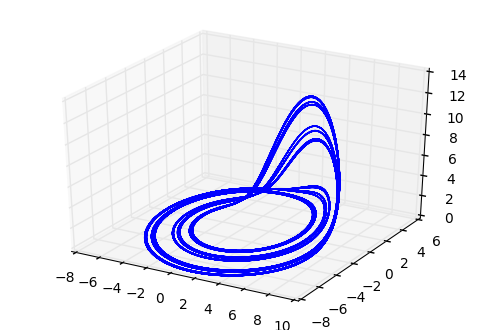

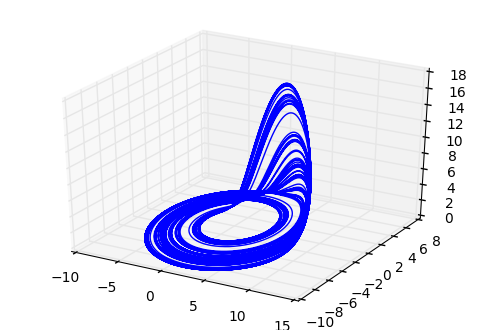

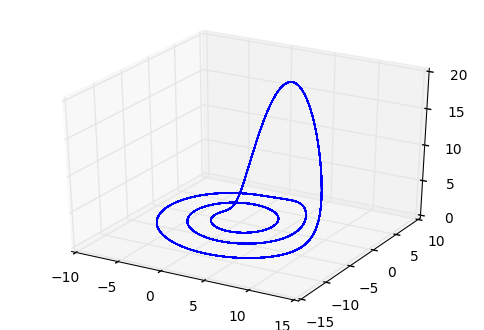

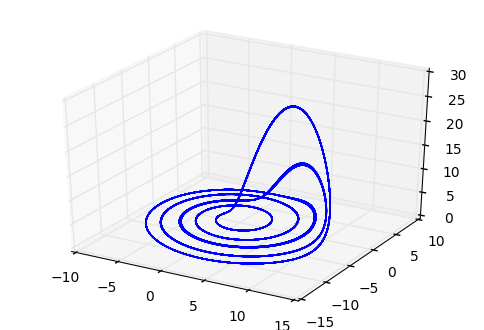

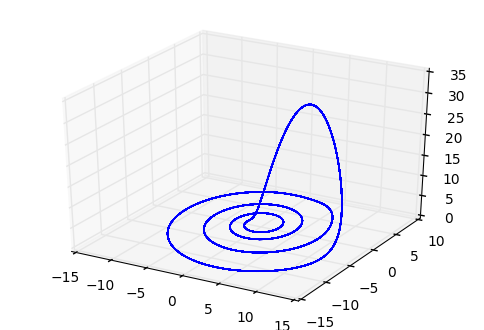

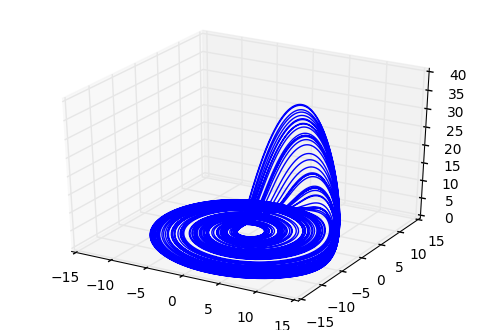

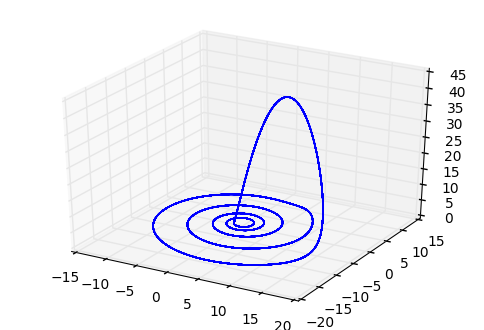

In [8]:
for c in [3.5, 4.0, 4.2, 5.0, 5.3, 6.0, 6.7, 7.5, 8.0]:
    plotr(c)